In [27]:
import os
import sys
from pathlib import Path
import warnings
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import yaml
import importlib
import numpy as np
import gvar as gv
import platform
import pprint
# import lsqfitics
cwd = Path(os.getcwd())
# Assuming your notebook is in the project root, set the project root as cwd
project_root = cwd.parent
print(project_root)
# If your notebook is in a subdirectory of the project root, you can modify the path accordingly:
# project_root = cwd.parent  # Go up one directory level
# project_root = cwd.parent.parent  # Go up two directory levels
# Add the project root directory to sys.path
sys.path.insert(0, str(project_root))
# sys.path.append('../')

# local imports 
import xpt.fit_analysis as xfa
import xpt.priors as priors
import xpt.i_o as i_o
import xpt.fit_routine as fit
import xpt.fpi_fit as fpi_fit
import xpt.plots as plots
import tests.tests as tests
warnings.simplefilter(action="default")
warnings.filterwarnings('ignore')
# Define paths and other variables
if platform.system() == 'Darwin':
    base_dir = '/Users/grantdb/lqcd'
else:
    base_dir = '/home/gmoney/lqcd'

data_dir = os.path.join(base_dir, "data")
hyperon_data_file = os.path.join(data_dir,"hyperon_data.h5")


/Users/grantdb/lqcd/hyperon-xpt-master


In [28]:
from importlib import reload
reload(xfa)
reload(i_o)
reload(fit)
reload(priors)

<module 'xpt.priors' from '/Users/grantdb/lqcd/hyperon-xpt-master/xpt/priors.py'>

In [29]:
# gv.load('../scale_setting.p')

In [30]:
# gv.load('../scale_setting.p')
with open('../xpt/models.yaml', 'r') as f:
    models = yaml.load(f, Loader=yaml.FullLoader)
xi_models = models['models']['xi_system']
lam_sigma_models = models['models']['lam_sigma_system']

In [47]:
reload(i_o)
prior = priors.get_prior(units='mev')
input_output_force = i_o.InputOutput(project_path=data_dir,force_correlation=True)
input_output = i_o.InputOutput(project_path=data_dir,force_correlation=False)
# data, ensembles = input_output.get_data(units='phys',show_raw=False)
data_force,ensembles = input_output_force.get_data(units='phys',show_raw=True)
print(data_force)
# new_prior = input_output.make_prior(data=data,prior=prior)
# new_prior_force = input_output_force.make_prior(data=data_force,prior=prior)
phys_point_data = input_output.get_data_phys_point()
# xi_test = {}
# for ens, i in enumerate(ensembles):
#     xi_test[i] = {}
#     for part in ['xi','xi_st']:
#         xi_test[i][part] = data['m_'+part][ens]

#         cov = gv.evalcov(xi_test[i])
# data
# cov
# my_test = tests.VerboseFitfcn()

s = gv.dataset.svd_diagnosis(data_force)
avgdata = gv.svd(s.avgdata, svdcut=s.svdcut)
s.plot_ratio(show=True)

KeyError: 'a09m135'

In [44]:
# Extrapolation:
# {'xi': {'sigma_pi': 39.5(2.9), 'mass': 1352(14)}, 'xi_st': {'sigma_pi': 47.5(6.5), 'mass': 1551(22)}}
# ---

# Error Budget:
# xi
#   stat    99.7%
#   chiral   0.6%
#   disc     0.5%
#   pp       0.0%
# xi_st
#   stat    99.8%
#   disc     1.2%
#   chiral   0.6%
#   pp       0.0%
# Least Square Fit:
#   chi2/dof [dof] = 2.3 [34]    Q = 2.2e-05    logGBF = -164.69

# Extrapolation:
# {'xi': {'sigma_pi': 42.6(6.4), 'mass': 1346(18)}, 'xi_st': {'sigma_pi': 48.9(9.3), 'mass': 1554(25)}}
# ---

# Error Budget:
# xi
#   stat    96.7%
#   disc     6.2%
#   chiral   1.6%
#   pp       0.0%
# xi_st
#   stat    97.4%
#   disc     6.4%
#   chiral   1.6%
#   pp       0.0%
# Least Square Fit:
#   chi2/dof [dof] = 0.41 [34]    Q = 1    logGBF = -147.59


In [45]:
reload(fit)
for mdl_key in xi_models:
    _model_info = xi_models[mdl_key]

    svd_fit = fit.FitRoutine(prior=new_prior_force,data=data_force, project_path=data_dir,model_info=_model_info,
                    phys_point_data=phys_point_data, emp_bayes=None,empbayes_grouping=None,svd_study=True,svd_tol = 1e-4)
    # svd_out = svd_fit.svd_diagnose
    print(svd_fit.fit)
    # print(svd_out.plot_ratio(show=True))

KeyError: 'm_lambda'

## Xi, Xi* system in physical units with scale setting ## 

In [ ]:
reload(xfa)
for mdl_key in xi_models:
            _model_info = xi_models[mdl_key]
            xfa_instance = xfa.Xpt_Fit_Analysis(phys_point_data=phys_point_data, data=data,model_info=_model_info, prior=new_prior, project_path=data_dir, verbose=False,svd_study=True)
            xfa_instance_force = xfa.Xpt_Fit_Analysis(phys_point_data=phys_point_data, data=data_force,model_info=_model_info, prior=new_prior_force, project_path=data_dir, verbose=False
            ,extrapolate=True)
            print(xfa_instance)
            print('force scale correlation:',xfa_instance_force)



xi_system = xfa.ModelComparsion(verbose=True, phys_point_data=phys_point_data,
                                data=data, models=xi_models, prior=new_prior,project_path=data_dir)

TypeError: svd_processor() takes 1 positional argument but 2 were given

In [ ]:
for mdl_key in lam_sigma_models:
            _model_info = lam_sigma_models[mdl_key]
            xfa_instance_lam = xfa.Xpt_Fit_Analysis(phys_point_data=phys_point_data, data=data,model_info=_model_info, prior=prior, project_path=data_dir, verbose=False
            ,extrapolate=True)
            # print(xfa_instance_lam)

lam_sigma_system = xfa.ModelComparsion(verbose=False, phys_point_data=phys_point_data,
                                data=data, models=lam_sigma_models, prior=new_prior,project_path=data_dir)
# lam_sigma_system.model_plots(system='lam_sigma')

## Xi, Xi* system in fpi units without scale setting ##
We can determine $M_H$ by fitting the dimensionless observable $\frac{M_H}{\Lambda_\Chi}$. In order to perform an extrapolation to the physical point, we subsequently multiply by $\Lambda_\Chi^*$, eg. the physical value. 
Differences between the following fit strategy and the fits obtained via directly fitting $M_H$ via scale setting, as previously performed:

    - Discertization and strange quark terms no longer need to be rescaled (eg. not multiplied through by $M_H^0$)
    - Need to take into account the $\Lambda_\Chi$ expansion, which depends on $F_\pi$ 
      - However, we can treat this llo term as a constant when performing a pure taylor fit (will differ by ensemble)
      - 


In [ ]:
prior_fpi = priors.get_prior(units='fpi')
input_output = i_o.InputOutput(project_path=data_dir)
data_units_fpi,ensembles = input_output.get_data(units='fpi')
new_prior_fpi = input_output.make_prior(data=data_units_fpi,prior=prior_fpi)
# data_units_fpi


In [ ]:
reload(xfa)
reload(fit)
for mdl_key in xi_models:
    xi_models[mdl_key]['units'] = 'fpi'
    model_info_ = xi_models[mdl_key]
    # print(model_info_)
    xfa_instance = xfa.Xpt_Fit_Analysis(phys_point_data=phys_point_data, data=data_units_fpi, 
                                            model_info=model_info_, prior=new_prior_fpi, 
                                            project_path=data_dir, verbose=True,extrapolate=False)
    print(xfa_instance)
    # xfa_instance.plot_params_fit(param='a',observable='xi',eps=True)
    # xfa_instance.plot_params_fit(param='epi',observable='xi',eps=True)

xi_system_fpi = xfa.ModelComparsion(verbose=True, phys_point_data=phys_point_data,
                                data=data_units_fpi, models=xi_models, prior=new_prior_fpi,project_path=data_dir)
xi_system_fpi.model_plots(system='xi')
# xfa_instance.plot_params(xparam='mpi_sq',observables=['xi','xi_st'],show_plot=True,units='gev')
# xfa_instance.plot_params(xparam='eps2_a',observables=['xi'],show_plot=True,eps=True)
# xfa_instance.plot_params(xparam='eps2_a',observables=['xi_st'],show_plot=True,eps=True)

# extrap_analysis.plot_params_fit(param='mpi_sq',observable='xi')
    

Model: xi:xi_st:d_n2lo:l_lo
---

Error Budget:
xi
  stat    99.7%
  disc     0.7%
  pp       0.2%
  chiral   0.1%
xi_st
  stat    99.9%
  disc     1.2%
  pp       0.0%
  chiral   0.0%
Least Square Fit:
  chi2/dof [dof] = 4.2 [34]    Q = 2.4e-15    logGBF = 45.893

Parameters:
       m_{xi,0}      1.13906 +- 0.00655422            [                   1 +- 1 ]  
         s_{xi}     -0.898532 +- 0.0748634            [                   0 +- 2 ]  
       d_{xi,a}     -0.531043 +- 0.0822341            [                  -2 +- 2 ]  
      d_{xi,aa}        1.10012 +- 0.284178            [                   2 +- 4 ]  
      d_{xi,al}        1.15348 +- 0.479777            [                   0 +- 5 ]  
    m_{xi_st,0}        1.24234 +- 0.010041            [                 1.1 +- 1 ]  
     s_{xi,bar}           8.13369e-12 +- 2            [                   0 +- 2 ]  
    d_{xi_st,a}         0.624111 +- 0.1508            [                   0 +- 2 ]  
   d_{xi_st,aa}      -0.983201 +- 0.531639 

KeyError: 'a_{xi,4}'

<Figure size 1000x1000 with 0 Axes>

In [ ]:
reload(xfa)
reload(i_o)
with open('../xpt/models.yaml', 'r') as f:
    models = yaml.load(f, Loader=yaml.FullLoader)
xi_models = models['models']['xi_system']
lam_sigma_models = models['models']['lam_sigma_system']
for mdl_key in lam_sigma_models:
    lam_sigma_models[mdl_key]['units'] = 'fpi'
    model_info_ = lam_sigma_models[mdl_key]
    # print(model_info_)
    xfa_instance = xfa.Xpt_Fit_Analysis(phys_point_data=phys_point_data, data=data_units_fpi, 
                                            model_info=model_info_, prior=new_prior_fpi, 
                                            project_path=data_dir, verbose=True,extrapolate=False)
    print(xfa_instance)
    # xfa_instance.plot_params_fit(param='a',observable='lambda',eps=True)
    # xfa_instance.plot_params_fit(param='epi',observable='lambda',eps=True)

lam_sigma_system_fpi = xfa.ModelComparsion(verbose=True, phys_point_data=phys_point_data,
                                data=data_units_fpi, models=lam_sigma_models, prior=new_prior_fpi,project_path=data_dir)
xi_system_fpi.model_plots(system='lam')
# xfa_instance.plot_params(xparam='mpi_sq',observables=['xi','xi_st'],show_plot=True,units='gev')
# xfa_instance.plot_params(xparam='eps2_a',observables=['xi'],show_plot=True,eps=True)
# xfa_instance.plot_params(xparam='eps2_a',observables=['xi_st'],show_plot=True,eps=True)

# extrap_analysis.plot_params_fit(param='mpi_sq',observable='xi')
    

Model: lam:sigma:sigma_st:l_lo:d_n2lo
---

Error Budget:
lambda
  stat    98.0%
  disc     8.9%
  chiral   0.3%
  pp       0.1%
sigma
  stat    95.5%
  disc     8.3%
  pp       1.2%
  chiral   0.3%
sigma_st
  stat    99.3%
  disc    18.5%
  chiral   0.9%
  pp       0.3%
Least Square Fit:
  chi2/dof [dof] = 1.8 [51]    Q = 0.00035    logGBF = 116.6

Parameters:
   m_{lambda,0}     0.975829 +- 0.00642529            [                 1.2 +- 1 ]  
     s_{lambda}      -0.565429 +- 0.244281            [                   0 +- 5 ]  
   d_{lambda,a}     -0.361892 +- 0.0881187            [                   0 +- 5 ]  
  d_{lambda,aa}        0.15371 +- 0.361772            [                   0 +- 5 ]  
  d_{lambda,al}         4.39785 +- 1.33544            [                   0 +- 5 ]  
    m_{sigma,0}      1.04166 +- 0.00631149            [                 1.3 +- 1 ]  
      s_{sigma}       -1.58759 +- 0.210841            [                   0 +- 5 ]  
    d_{sigma,a}     -0.225407 +- 0.0921231

KeyError: 'undefined key: m_{lambda,0}'

### $F_\pi$ Fit ###

Needed for $\frac{M_H}{\Lambda_\Chi}$ llo chiral term expansion and sigma term determination 

In [ ]:
fpi_models = models['models']['fpi']
model_info_fpi = fpi_models['fpi:l_n2lo:d_n2lo:x_n2lo']
fit_fpi = fpi_fit.fit_routine(prior=new_prior, data=data, model_info=model_info_fpi)
fit_fpi_out = fit_fpi.fit
extrap_fpi = fpi_fit.Fpi(datatag='Fpi',model_info=model_info_fpi)
extrap = extrap_fpi.fitfcn(p=fit_fpi_out.p)
#print(fit_fpi_out)
print( '\n','ens:',ensembles,'\n','extrapolation:',extrap, '\n',fit_fpi_out.format(True))
#print('extrapolation:','\n','M_0/lam_chi:',extrap_mass, '\n','M_0(meV):',extrap_mass_phys,'\n',fit_fpi_out)

KeyError: 'Fpi'

In [ ]:
reload(xfa)
for mdl_key in xi_models:
    xi_models[mdl_key]['units'] = 'fpi'
    model_info_ = xi_models[mdl_key]
    print(model_info_)
    xfa_instance = xfa.Xpt_Fit_Analysis(phys_point_data=phys_point_data, data=data_units_fpi, 
                                            model_info=model_info_, prior=new_prior_fpi, 
                                            project_path=data_dir, verbose=False,extrapolate=False)
    # print(xfa_instance)
    xfa_instance.plot_params_fit(param='a',observable='xi',eps=True)
    xfa_instance.plot_params_fit(param='epi',observable='xi',eps=True)


# xfa_instance.plot_params(xparam='mpi_sq',observables=['xi','xi_st'],show_plot=True,units='gev')
# xfa_instance.plot_params(xparam='eps2_a',observables=['xi'],show_plot=True,eps=True)
# xfa_instance.plot_params(xparam='eps2_a',observables=['xi_st'],show_plot=True,eps=True)

# extrap_analysis.plot_params_fit(param='mpi_sq',observable='xi')
    

{'name': 'xi:xi_st:d_n2lo:l_lo', 'particles': ['xi', 'xi_st'], 'eps2a_defn': 'w0_imp', 'order_chiral': None, 'order_disc': 'n2lo', 'order_strange': None, 'order_light': 'lo', 'xpt': False, 'fv': True, 'units': 'fpi'}
{'name': 'xi:xi_st:d_n2lo:l_n2lo', 'particles': ['xi', 'xi_st'], 'eps2a_defn': 'w0_imp', 'order_chiral': None, 'order_disc': 'n2lo', 'order_strange': None, 'order_light': 'n2lo', 'xpt': False, 'fv': True, 'units': 'fpi'}
{'name': 'xi:xi_st:d_n2lo:l_n2lo:x_n2lo', 'particles': ['xi', 'xi_st'], 'eps2a_defn': 'w0_imp', 'order_chiral': 'n2lo', 'order_disc': 'n2lo', 'order_strange': 'n2lo', 'order_light': 'n2lo', 'xpt': True, 'fv': True, 'units': 'fpi'}
{'name': 'xi:xi_st:d_n2lo:l_nlo:x_n2lo', 'particles': ['xi', 'xi_st'], 'eps2a_defn': 'w0_imp', 'order_chiral': 'n2lo', 'order_disc': 'n2lo', 'order_strange': None, 'order_light': 'nlo', 'xpt': True, 'fv': True, 'units': 'fpi'}
{'name': 'xi:xi_st:d_n2lo:l_n2lo:s_lo', 'particles': ['xi', 'xi_st'], 'eps2a_defn': 'w0_imp', 'order_chi

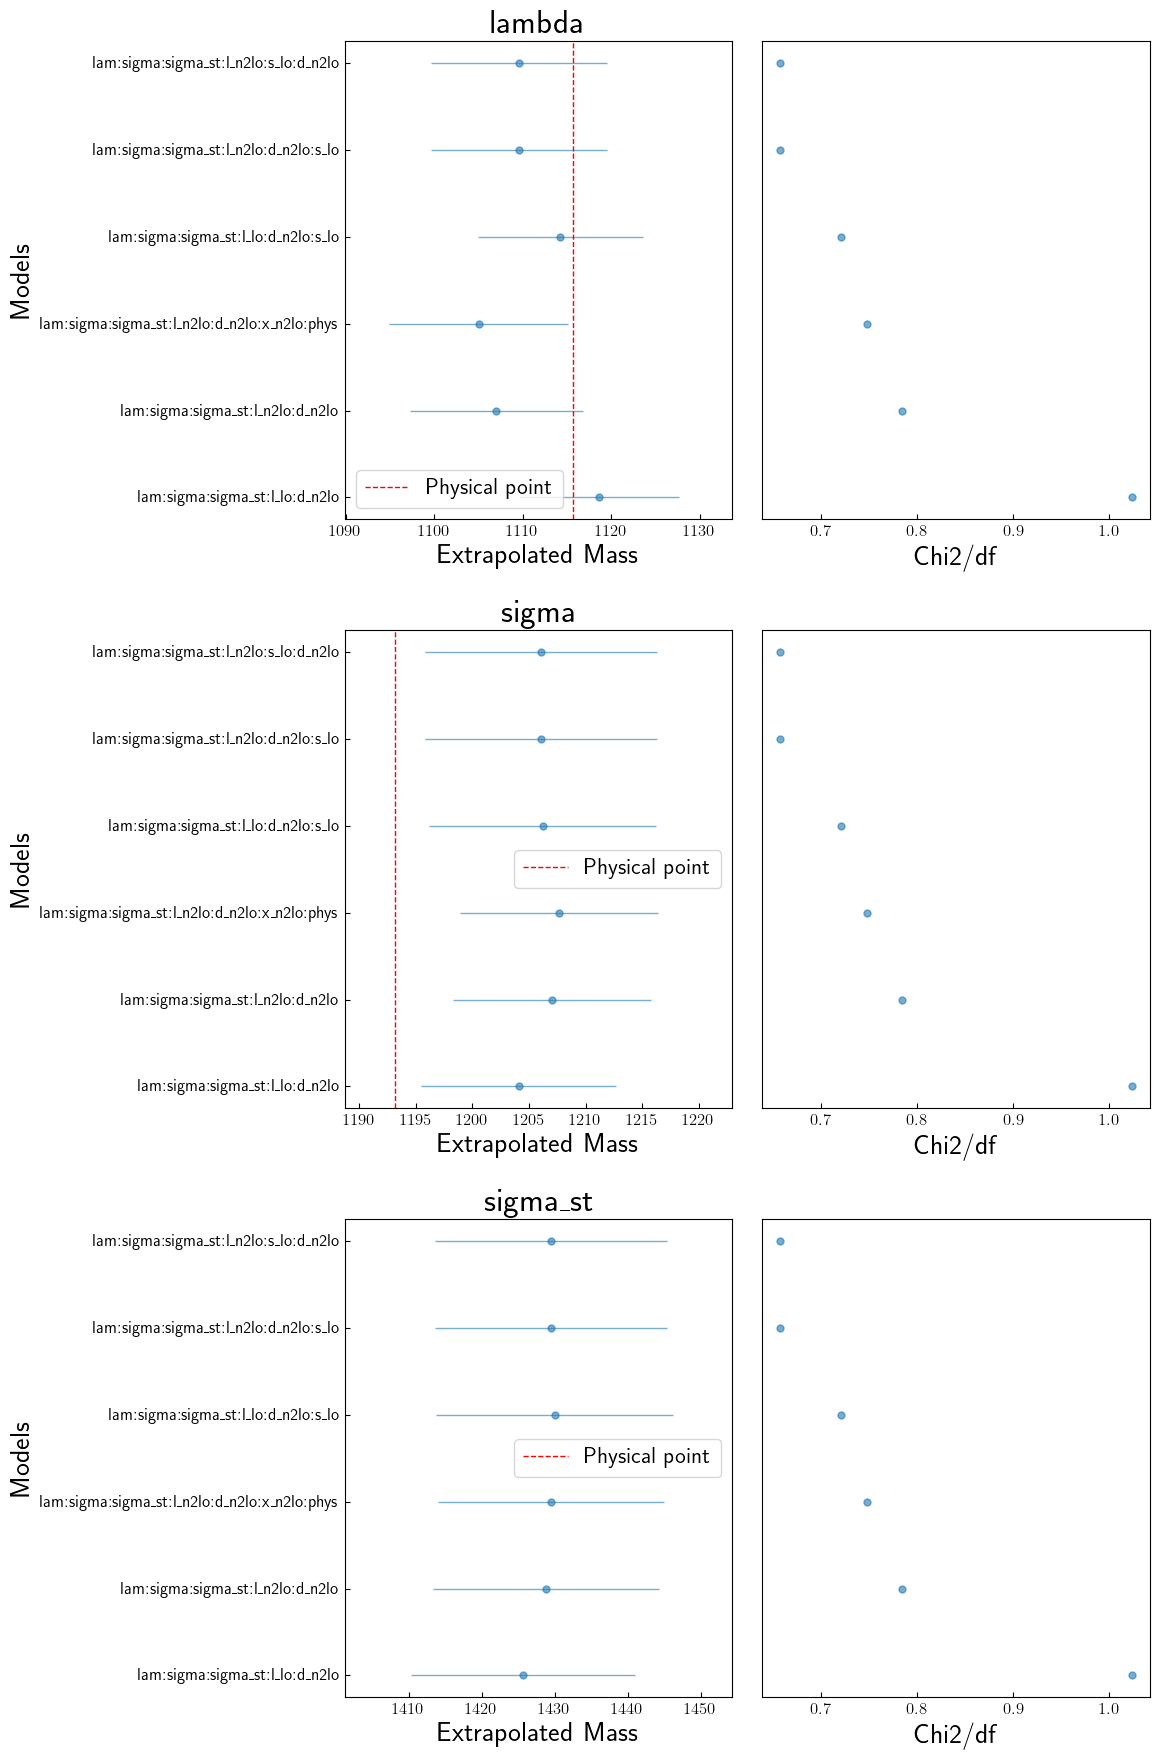

In [ ]:
reload(xfa)
reload(fit)
import lsqfitics
for mdl_key in lam_sigma_models:
    model_info_ = lam_sigma_models[mdl_key]
    # try:
    extrap_analysis_lam = xfa.Xpt_Fit_Analysis(verbose=True, phys_point_data=phys_point_data,
                            data=data, model_info=model_info_, prior=new_prior,project_path=data_dir)
    fit_out_lam = extrap_analysis_lam.fit
#     # print(fit_out_lam)
#     print(extrap_analysis_lam)
    # except Exception as e:
    #     print(f"Error encountered for Model: {mdl_key}")
    #     print(f"Error details: {e}")
    #     continue
    
# extrap_analysis.plot_params(xparam='mpi_sq',observables='xi',show_plot=True,units='gev')
extrap_analysis_lam.plot_params(xparam='eps2_a',observables=['lambda','sigma','sigma_st'],show_plot=True,eps=False)
    # extrap_analysis.plot_params_fit(param='a',observable='xi',eps=False)
# extrap_analysis.plot_params_fit(param='mpi_sq',observable='xi')

'''model average with lsqfitics'''
# y_fit_ = extrap_analysis.extrapolation()
# print(y_fit_)

compare = xfa.ModelComparsion(verbose=True, phys_point_data=phys_point_data,
                                data=data, models=lam_sigma_models, prior=new_prior,project_path=data_dir)
compare.compare_models(particles=['lambda','sigma','sigma_st'])
compare.model_average(particles=['lambda','sigma','sigma_st'])
compare.model_plots()

In [ ]:
# model_info_fpi = xi_models['xi:xi_st:d_n2lo:l_n2lo:x_n2lo:fpi']
# # fpi units # 
# xi_fit_fpi = fit.FitRoutine(prior=prior_fpi,data=data_units_fpi, project_path=data_dir,model_info=model_info_fpi,
#                     phys_point_data=phys_point_data, emp_bayes=None,empbayes_grouping=None)
# # print(xi_fit_fpi)
# # print(xi_fit_fpi.extrapolation(observables=['sigma_pi','mass'],data=phys_point_data))
# extrap_analysis_fpi = xfa.Xpt_Fit_Analysis(verbose=False, phys_point_data=phys_point_data,
#                                 data=data_units_fpi, model_info=model_info_fpi, prior=new_prior_fpi,project_path=data_dir)
# print(extrap_analysis_fpi)



### Lambda, Sigma, Sigma_star SU(2) hbxpt extrapolation


In [ ]:
model_info_lam = lam_sigma_models['lam:sigma:sigma_st:l_n2lo:d_n2lo:x_n2lo:phys']
lam_fit = fit.FitRoutine(prior=prior,data=data, project_path=data_dir,model_info=model_info_lam,
                    phys_point_data=phys_point_data, emp_bayes=None,empbayes_grouping=None)

# print(lam_fit)
# print(lam_fit.extrapolation(observables=['sigma_pi','mass'],data=phys_point_data))

In [ ]:
reload(i_o)
xi_out = xi_fit.fit
m_pi = phys_point_data['m_pi']
lam_chi = phys_point_data['lam_chi']
m_proton = xi_out.p['m_{xi,0}']
e_pi = m_pi / lam_chi
# sigma = m_pi**2 *gv.deriv(m_proton, e_pi**2)
# print(sigma)
l3 = gv.gvar('3.53(26)')
l4 = gv.gvar('4.73(10)')
term_0 = lam_chi * e_pi/2 * m_proton
term_1 = lam_chi * e_pi/2 * m_proton * e_pi**2*(5/2 - l3/2 - 2*l4 )
term_2 = e_pi**2 * m_proton*(l4-1)
sigma = term_0 + term_1 + term_2
print(term_0,term_1,term_2,sigma)
# sigma_analytic = (e_pi/2 * (1 + e_pi**2*(5/2 - l3/2 - 2*l4 )) *m_proton_deriv) * lam_chi
print('sigma w/ gv.deriv:',sigma)
print('sigma analytic:',sigma_analytic)


NameError: name 'xi_fit' is not defined

In [ ]:

importlib.reload(xfa)
importlib.reload(fit)
importlib.reload(i_o)

def perform_fit_and_plot(model_type,mdl_key):
    mdl_info = model_type[mdl_key]
    extrap_analysis = xfa.Xpt_Fit_Analysis(verbose=False, phys_point_data=phys_point_data,
                                data=data, model_info=mdl_info, prior=new_prior,project_path=data_dir)
    fit_out = extrap_analysis.fit
    for part in mdl_info['particles']:
        extrap_analysis.plot_params(observable=part,xparam='eps2_a',show_plot=True)
        print(f"Model: {mdl_key}")
        # print(fit_out)

    # print(extrap_analysis)

        # return fit_out

with open('../xpt/models.yaml', 'r') as f:
    models = yaml.load(f, Loader=yaml.FullLoader)
xi_models = models['models']['xi_system']
for mdl_key in xi_models:
    # mdl_info = xi_models[mdl_key]
    try:
        perform_fit_and_plot(xi_models,mdl_key)
    except Exception as e:
        print(f"Error encountered for Model: {mdl_key}")
        print(f"Error details: {e}")
        continue
    


In [ ]:
from scipy.interpolate import interp1d
importlib.reload(xfa)

def perform_fit_and_plot(model_type,mdl_key):
    mdl_info = model_type[mdl_key]
    extrap_analysis = xfa.fit_analysis(verbose=False, phys_point_data=phys_point_data,
                                data=data, model_info=mdl_info, prior=new_prior)
    fit_out = extrap_analysis.fit
    print(fit_out)
    print(f"Model: {mdl_key}")
    print(extrap_analysis)

    # x_data = [gv.mean(x) for x in extrap_analysis.fit.p['eps2_a']]
    # for part in mdl_info['particles']:
    #     y_data = [gv.mean(y) for y in extrap_analysis.fit.y[part]]

    # y_fit = interp1d(x_data, y_data, kind='cubic', fill_value='extrapolate')

    # x_fit = np.linspace(-0.1, 0.1, 100)
    # y_fit_vals = [y_fit(x) for x in x_fit]

    # plt.plot(x_fit, y_fit_vals, label=f"{mdl_key}")
    # plt.fill_between(x_fit, [y - gv.sdev(y) for y in y_fit_vals], [y + gv.sdev(y) for y in y_fit_vals], alpha=0.5)

    # plt.axvline(0, ls='--', color='black', label='phys. point')
    # y_phys = np.mean([gv.gvar(g) for g in ['1314.86(20)', '1321.71(07)']])
    
    # plt.plot(0, gv.mean(y_phys), marker='o', mec='w', zorder=0.2, color='black')

    # plt.xlabel("$\epsilon_a^2$")
    # plt.ylabel("$m_\Xi(MeV)$")
    # plt.legend()
    # plt.grid()
    # plt.show()
    return fit_out


In [ ]:
with open('../xpt/models.yaml', 'r') as f:
    models = yaml.load(f, Loader=yaml.FullLoader)
lam_sig_models = models['models']['lam_sigma_system']
for mdl_key in lam_sig_models:
    try:
        perform_fit_and_plot(lam_sig_models,mdl_key)
    except Exception as e:
        print(f"Error encountered for Model: {mdl_key}")
        print(f"Error details: {e}")
        continue
    

In [ ]:
lam_sig_models = models['models']['lam_sigma_system']
model_info = lam_sig_models['lam:sigma:sigma_st:l_lo:d_n2lo:s_lo']
my_fit = fit.FitRoutine(phys_point_data=phys_point_data,emp_bayes=None,empbayes_grouping=None,
                                data=data,model_info=model_info,prior=new_prior)
lam_sigma_sys_out = my_fit.fit
plot_params(fit=lam_sigma_sys_out,yparam='lambda')

In [ ]:
lam_sigma_fit = perform_fit_and_plot(model_type=mod)
plot_params()

### Lambda, Sigma, Sigma_star SU(2) hbxpt extrapolation

In [ ]:
with open('../xpt/models.yaml', 'r') as f:
    models = yaml.load(f, Loader=yaml.FullLoader)
lam_sig_models = models['models']['lam_sigma_system']
for mdl_key in lam_sig_models:
    perform_fit_and_plot(lam_sig_models,mdl_key)